## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)

In [3]:
# Update SPECIAL_CONSIDERATIONS to binary
application_df["SPECIAL_CONSIDERATIONS"] = application_df["SPECIAL_CONSIDERATIONS"].replace({"Y": 1, "N": 0})

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,0,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,0,142590,1


In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

# Update True/False columns to 1/0
application_df = application_df.replace({True:1, False:0})

application_df.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [6]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
print(len(X_train[0]))

115


## Compile, Train and Evaluate the Model

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=115, activation="relu", input_dim=number_input_features))

# 2nd hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# 4th hidden layer
# nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13340     
                                                                 
 dense_1 (Dense)             (None, 4)                 464       
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13829 (54.02 KB)
Trainable params: 13829 (54.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 820us/step - loss: 0.5843 - accuracy: 0.7152
Epoch 2/100
804/804 [==============================] - 1s 814us/step - loss: 0.5533 - accuracy: 0.7265
Epoch 3/100
804/804 [==============================] - 1s 811us/step - loss: 0.5499 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 1s 835us/step - loss: 0.5484 - accuracy: 0.7290
Epoch 5/100
804/804 [==============================] - 1s 821us/step - loss: 0.5471 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 1s 836us/step - loss: 0.5461 - accuracy: 0.7350
Epoch 7/100
804/804 [==============================] - 1s 806us/step - loss: 0.5452 - accuracy: 0.7358
Epoch 8/100
804/804 [==============================] - 1s 818us/step - loss: 0.5429 - accuracy: 0.7353
Epoch 9/100
804/804 [==============================] - 1s 853us/step - loss: 0.5424 - accuracy: 0.7362
Epoch 10/100
804/804 [==============================] - 1s 828us/step - l

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Loss: 0.5554059743881226, Accuracy: 0.7258309125900269 - 4 NODES, 3 HIDDEN LAYERS
# Loss: 0.556983470916748, Accuracy: 0.726064145565033 - 6 NODES
# Loss: 0.5570246577262878, Accuracy: 0.7262973785400391 - 10 NODES
# Loss: 0.5572429895401001, Accuracy: 0.7264139652252197 - 6 NODES, 2 HIDDEN LAYERS
# Loss: 0.5564694404602051, Accuracy: 0.7271137237548828 - 2 NODES, 2 HIDDEN LAYERS
# Loss: 0.5539696216583252, Accuracy: 0.7273469567298889 - 4 NODES
# Loss: 0.5572041273117065, Accuracy: 0.727580189704895 - 4 NODES, 2 HIDDEN LAYERS


268/268 - 0s - loss: 0.5685 - accuracy: 0.7266 - 264ms/epoch - 984us/step
Loss: 0.5684513449668884, Accuracy: 0.7266472578048706


<Axes: >

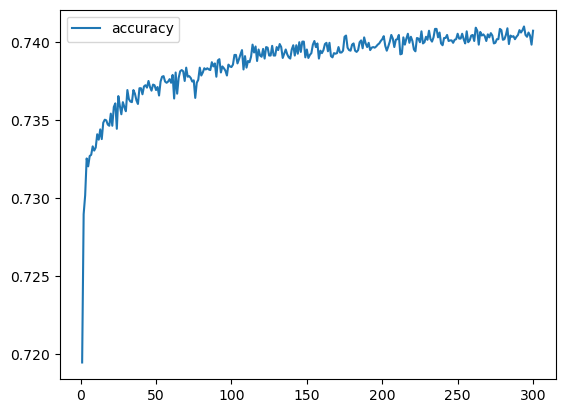

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [32]:
import h5py

# Export our model to HDF5 file
# Warning said HDF5 file was legacy file format, so I used h5 instead of hdf5.
with h5py.File('AlphabetSoupCharity_Optimization.h5', 'w') as f:
    nn.save(f)

c:\Users\inlik\anaconda3\envs\dev2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
